# 

In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('Churn_Modelling.csv')

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Data Processing part

In [5]:
df.info

<bound method DataFrame.info of       RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfP

In [6]:
df.describe

<bound method NDFrame.describe of       RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumO

In [7]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

In [8]:
df.duplicated().sum()

0

In [9]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [10]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [11]:
##we'll remove row number, customer id and durname

df.drop(columns= ['RowNumber', 'CustomerId', 'Surname'], inplace = True)

In [12]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [13]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [21]:
##convert the categorical data into numeric data

new_df=pd.get_dummies(df, columns = ['Geography', 'Gender'], drop_first = True, dtype= int)


##get_dummies uses one_hot_encode technique to convert categoricall data to 0 and 1

In [22]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Age                10000 non-null  int64  
 2   Tenure             10000 non-null  int64  
 3   Balance            10000 non-null  float64
 4   NumOfProducts      10000 non-null  int64  
 5   HasCrCard          10000 non-null  int64  
 6   IsActiveMember     10000 non-null  int64  
 7   EstimatedSalary    10000 non-null  float64
 8   Exited             10000 non-null  int64  
 9   Geography_Germany  10000 non-null  int32  
 10  Geography_Spain    10000 non-null  int32  
 11  Gender_Male        10000 non-null  int32  
dtypes: float64(2), int32(3), int64(7)
memory usage: 820.4 KB


In [24]:
new_df.head(3)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0


# Separate training and testing data

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
x= new_df.drop(columns= ['Exited'])
y= new_df['Exited']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1 )




#testing data=20%
#training data = 80%


In [28]:
x

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [29]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [31]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Age                10000 non-null  int64  
 2   Tenure             10000 non-null  int64  
 3   Balance            10000 non-null  float64
 4   NumOfProducts      10000 non-null  int64  
 5   HasCrCard          10000 non-null  int64  
 6   IsActiveMember     10000 non-null  int64  
 7   EstimatedSalary    10000 non-null  float64
 8   Exited             10000 non-null  int64  
 9   Geography_Germany  10000 non-null  int32  
 10  Geography_Spain    10000 non-null  int32  
 11  Gender_Male        10000 non-null  int32  
dtypes: float64(2), int32(3), int64(7)
memory usage: 820.4 KB


# Scaling

In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [34]:
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [36]:
x_train_scaled[0]

array([-0.23082038, -0.94449979, -0.70174202,  0.58817274,  0.80225696,
       -1.55337352,  0.97725852,  0.42739449,  1.71490137, -0.57273139,
        0.91509065])

In [37]:
x_train_scaled

array([[-0.23082038, -0.94449979, -0.70174202, ...,  1.71490137,
        -0.57273139,  0.91509065],
       [-0.25150912, -0.94449979, -0.35520275, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [-0.3963303 ,  0.77498705,  0.33787579, ...,  1.71490137,
        -0.57273139, -1.09278791],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 0.13123255,  0.01077067,  1.03095433, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 1.1656695 ,  0.29735181,  0.33787579, ...,  1.71490137,
        -0.57273139,  0.91509065]])

In [40]:
x_test_scaled[0]

array([-1.03768121,  0.77498705, -1.0482813 , -1.22599173,  0.80225696,
        0.64376017,  0.97725852, -0.05360571, -0.58312392, -0.57273139,
        0.91509065])

In [43]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [79]:
model = Sequential()

In [80]:
#model.add(Dense(3, activation='sigmoid', input_dim =11 ))  #hidden layer with 3 nodes/perceptron having 11 inputs that will be conncetdd to input layer
#model.add(Dense(1, activation='sigmoid')) #output layer

##lets add one more layer to improve the accuracy

In [81]:

model.add(Dense(11, activation='relu', input_dim =11 )) 
model.add(Dense(11, activation = 'relu'))
model.add(Dense(1, activation='sigmoid'))

In [82]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 11)                132       
                                                                 
 dense_16 (Dense)            (None, 11)                132       
                                                                 
 dense_17 (Dense)            (None, 1)                 12        
                                                                 
Total params: 276 (1.08 KB)
Trainable params: 276 (1.08 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Compile and training

In [83]:
model.compile(loss='binary_crossentropy', optimizer= 'Adam', metrics = 'accuracy')

In [89]:
history = model.fit(x_train_scaled, y_train, epochs =100, validation_split = 0.2)
#val_split= separates 20% of data for testing

Epoch 1/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3499 - accuracy: 0.8575 - val_loss: 0.3573 - val_accuracy: 0.8525
Epoch 2/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3464 - accuracy: 0.8603 - val_loss: 0.3557 - val_accuracy: 0.8512
Epoch 3/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3438 - accuracy: 0.8611 - val_loss: 0.3542 - val_accuracy: 0.8519
Epoch 4/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3413 - accuracy: 0.8641 - val_loss: 0.3535 - val_accuracy: 0.8519
Epoch 5/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3395 - accuracy: 0.8623 - val_loss: 0.3517 - val_accuracy: 0.8519
Epoch 6/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3380 - accuracy: 0.8631 - val_loss: 0.3532 - val_accuracy: 0.8512
Epoch 7/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3368 - accuracy: 0.8637 - val_loss: 0.3525 - val_accuracy: 0.8525

In [92]:
#model.layers[0].get_weights()
model.layers[1].get_weights()

[array([[-5.3699672e-01,  2.6408994e-01, -4.9199215e-01, -8.0742085e-01,
          9.1576672e-01, -4.4777006e-01, -3.6968493e-01, -7.8790712e-01,
         -2.9771739e-01,  3.7244007e-01,  6.9962704e-01],
        [-4.6548045e-01, -8.7944239e-01, -2.2114763e-01,  3.3999699e-01,
          7.1403226e-03,  1.5040842e-01,  1.3685833e-01,  6.9305204e-02,
          7.1462905e-01,  4.8975533e-01, -4.4394764e-01],
        [ 2.3511061e-01, -1.9692574e-01,  4.0539065e-01, -8.4302735e-01,
         -5.0487572e-01, -5.7153190e-03, -4.7509122e-01,  1.4057590e-01,
          6.2573552e-01, -1.8350008e-01,  5.1950240e-01],
        [ 3.2663560e-01, -4.4560337e-01, -9.2495108e-01, -7.9800017e-02,
          2.4205139e-01, -3.8901493e-01, -3.9897859e-01,  6.8137378e-01,
          2.6098236e-01, -1.4791168e+00,  3.9065841e-01],
        [ 1.4310029e-01,  2.1601278e-01, -6.6014326e-01,  3.1123236e-01,
          3.7416894e-02, -5.9686565e-01, -2.8458233e-03,  5.9112298e-01,
         -2.2802044e-02,  4.9057800e-0

In [93]:
y_log = model.predict(x_test_scaled)

#since we used sigmoid activation func so values ae between 0-1 
#therefore, lets convert it to 0 and 1

63/63 [==============================] - 0s 2ms/step


In [94]:
y_pred = np.where(y_log>0.5, 1, 0)  #if >0.5 then 1 else 0

In [95]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

##80% only, we can improve by changing neural n/w and increasing epochs, or using relu function

##chnged to 85%..improved

0.8575

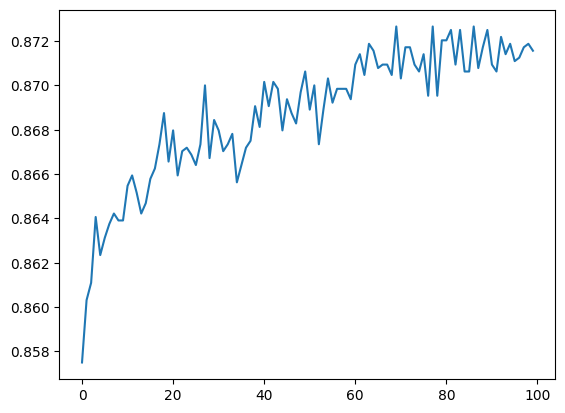

In [97]:
from matplotlib import pyplot as plt

plt.plot(history.history['accuracy'])

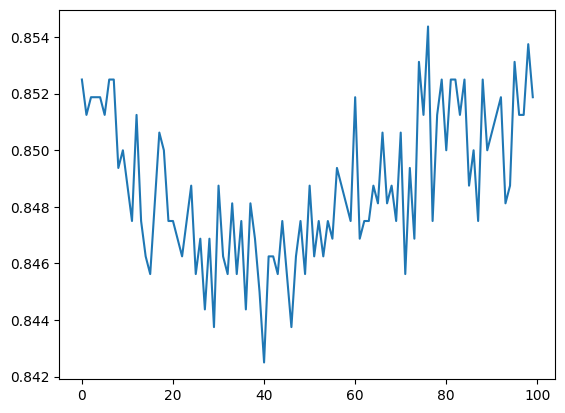

In [98]:

plt.plot(history.history['val_accuracy'])

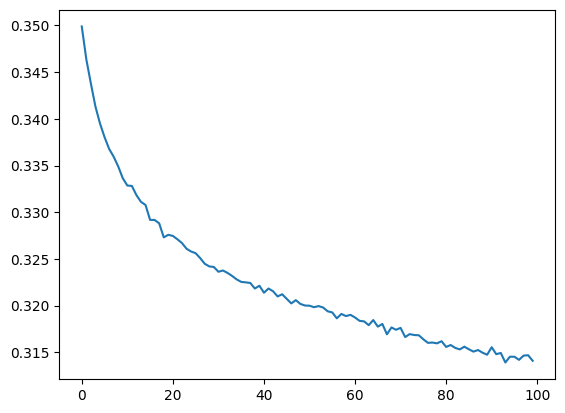

In [99]:

plt.plot(history.history['loss'])

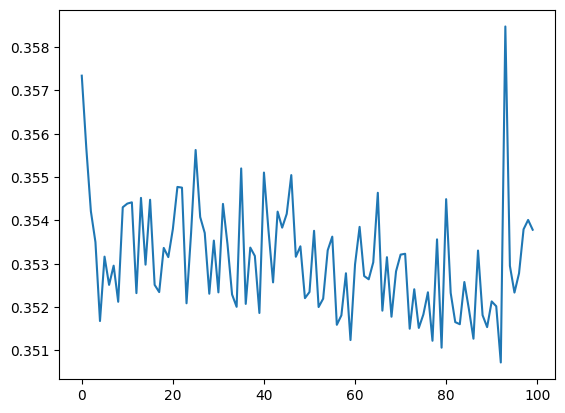

In [100]:

plt.plot(history.history['val_loss'])